# Leaky Building Pit

Testing the LeakyBuildingPit.

1. [Single layer model](#1-single-layer-model)
2. [Single layer model with well](#2-single-layer-model-with-well)
3. [Single layer model LeakyBuildingPit vs LeakyLineDoublets](#3-single-layer-model-leakybuildingpit-vs-leakylinedoublet)
4. [Two-layer model](#4-two-layer-model)
5. [Two layer model with well](#5-two-layer-model-with-well)
6. [Two layer model LeakyBuildingPit vs LeakyLineDoublet](#6-two-layer-model-leakybuildingpit-vs-leakylinedoublet)

In [1]:
import timml as tml
import numpy as np
import matplotlib.pyplot as plt

## 1. Single layer model

Compare single layer solution with LeakyBuildingPit to model with impermeable wall.
Solution should be equal for: 

- res = $\infty$

In [2]:
res = np.inf

In [3]:
# model parameters
kh = 10  # m/day
kv = 0.25 * kh  # m/day

ctop = 1000.0  # resistance top leaky layer in days
ctop_in = 1.0  # resistance top leaky layer inside pit, in days

ztop = 0.0  # surface elevation
zbot = -20.0  # bottom elevation of the model

h_bem = -1.0  # m, top boundary in pit

dx = 40.0  # length building pit in m
dy = 30.0  # width building pit in m

xy = [
    (-dx / 2, -dy / 2),
    (dx / 2, -dy / 2),
    (dx / 2, dy / 2),
    (-dx / 2, dy / 2),
    (-dx / 2, -dy / 2),
]

# get data ready for timml
z = np.array([ztop + 1, ztop, zbot])
dz = z[1::2] - z[2::2]
kh_arr = kh * np.ones(dz.shape)
c_outside = np.r_[np.array([ctop]), dz[:-1] / (2 * kv) + dz[1:] / (2 * kv)]
c_inside = np.r_[np.array([ctop_in]), dz[:-1] / (2 * kv) + dz[1:] / (2 * kv)]

In [4]:
# reference solution for res -> inf
ml0_ref = tml.ModelMaq(kaq=kh_arr, z=z, c=c_outside, topboundary="semi", hstar=0.0)
bpit = tml.BuildingPit(
    ml0_ref,
    xy,
    kaq=kh_arr,
    z=z,
    topboundary="semi",
    hstar=h_bem,
    c=c_inside,
    layers=[0],
)
ml0_ref.solve()

Number of elements, Number of equations: 10 , 32
..........
solution complete


In [5]:
ml0 = tml.ModelMaq(kaq=kh_arr, z=z, c=c_outside, topboundary="semi", hstar=0.0)
bpit = tml.LeakyBuildingPit(
    ml0,
    xy,
    kaq=kh_arr,
    z=z,
    topboundary="semi",
    hstar=h_bem,
    c=c_inside,
    layers=[0],
    res=res,
)
ml0.solve()

Number of elements, Number of equations: 10 , 32
..........
solution complete


In [6]:
# contour only interesting if res < inf
if np.isfinite(res):
    ml0.contour(
        win=(-dx / 2, dx / 2, -dy / 2, dy / 2), ngr=51, levels=30, decimals=3, layers=[0]
    );

In [7]:
x = np.linspace(-100, 100, 100)
h0 = ml0.headalongline(x, np.zeros_like(x))
h0_ref = ml0_ref.headalongline(x, np.zeros_like(x))

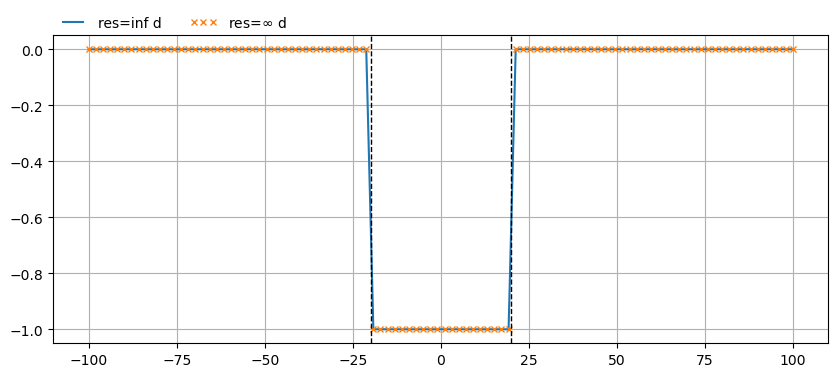

In [8]:
plt.figure(figsize=(10, 4))
plt.plot(x, h0[0], label=f"res={res:.0f} d")
plt.plot(x, h0_ref[0], marker="x", ms=4, ls="none", label="res=$\infty$ d")
plt.axvline(-dx / 2, ls="dashed", color="k", lw=1.0)
plt.axvline(dx / 2, ls="dashed", color="k", lw=1.0)
plt.grid(True)
plt.legend(loc=(0, 1), frameon=False, ncol=2, numpoints=3);

In [9]:
Qn0 = ml0.disvecalongline(x, np.zeros_like(x))[0]
Qn0_ref = ml0_ref.disvecalongline(x, np.zeros_like(x))[0]

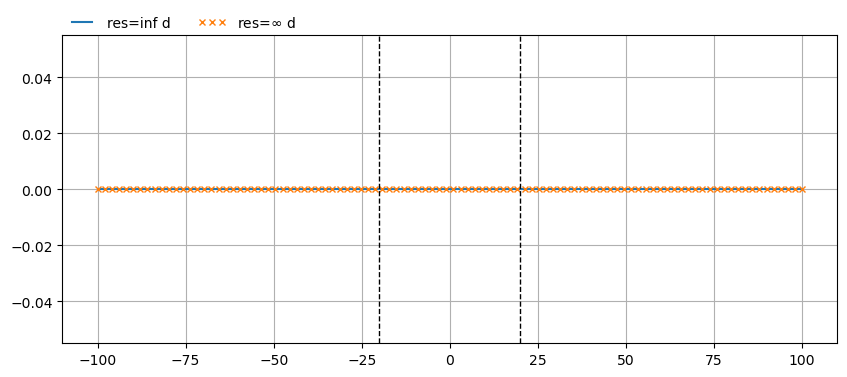

In [10]:
plt.figure(figsize=(10, 4))
plt.plot(x, Qn0[0], label=f"res={res:.0f} d")
plt.plot(x, Qn0_ref[0], marker="x", ms=4, ls="none", label="res=$\infty$ d")
plt.axvline(-dx / 2, ls="dashed", color="k", lw=1.0)
plt.axvline(dx / 2, ls="dashed", color="k", lw=1.0)
plt.grid(True)
plt.legend(loc=(0, 1), frameon=False, ncol=2, numpoints=3);

## 2. Single layer model with well

Compare a single layer model with LeakyBuildingPit to model with only a well.
Should be equal when

- res $\rightarrow 0$

In [11]:
res = 1e-5

In [12]:
ml1 = tml.ModelMaq(kaq=kh_arr, z=z, c=c_outside, topboundary="semi", hstar=0.0)
bpit = tml.LeakyBuildingPit(
    ml1,
    xy,
    kaq=kh_arr,
    z=z,
    topboundary="semi",
    c=c_outside,
    layers=[0],
    res=res,
    hstar=0.0,
)
well = tml.Well(ml1, 0.0, 0.0, Qw=100.0)
ml1.solve()

Number of elements, Number of equations: 11 , 32
...........
solution complete


In [13]:
ml1_ref = tml.ModelMaq(kaq=kh_arr, z=z, c=c_outside, topboundary="semi", hstar=0.0)
well = tml.Well(ml1_ref, 0.0, 0.0, Qw=100.0)
ml1_ref.solve()

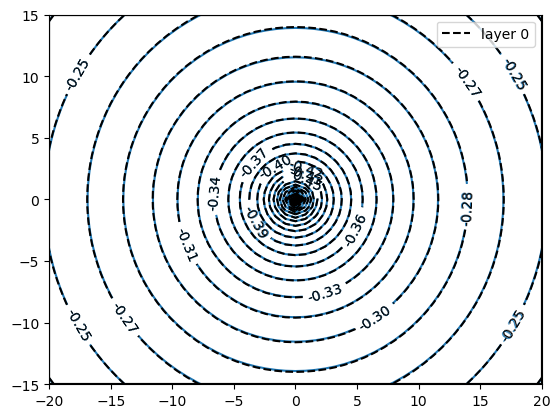

In [14]:
ml1.contour(
    win=(-dx / 2, dx / 2, -dy / 2, dy / 2),
    ngr=51,
    levels=30,
    decimals=2,
    layers=[0],
)
ml1_ref.contour(
    win=(-dx / 2, dx / 2, -dy / 2, dy / 2),
    ngr=51,
    levels=30,
    decimals=2,
    layers=[0],
    linestyles="dashed",
    color="k",
    newfig=False,
);


In [15]:
x = np.linspace(-100, 100, 100)
h1 = ml1.headalongline(x, np.zeros_like(x))
h1_ref = ml1_ref.headalongline(x, np.zeros_like(x))

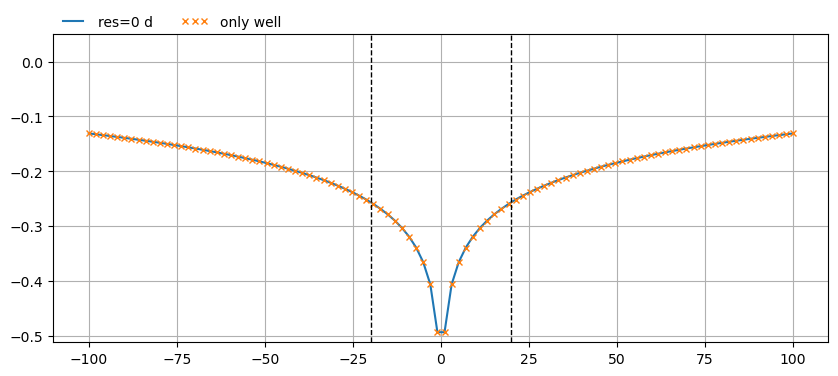

In [16]:
plt.figure(figsize=(10, 4))
plt.plot(x, h1[0], label=f"res={res:.0f} d")
plt.plot(x, h1_ref[0], marker="x", ms=4, ls="none", label="only well")
plt.axvline(-dx / 2, ls="dashed", color="k", lw=1.0)
plt.axvline(dx / 2, ls="dashed", color="k", lw=1.0)
plt.grid(True)
plt.legend(loc=(0, 1), frameon=False, ncol=2, numpoints=3)
plt.ylim(top=0.05);

In [17]:
Qn1 = ml1.disvecalongline(x, np.zeros_like(x))[0]

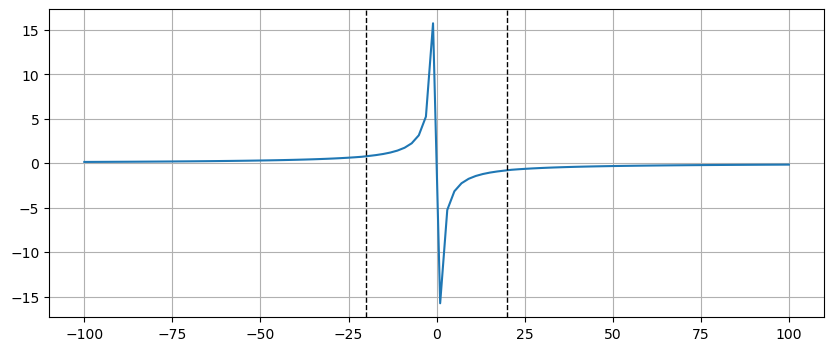

In [18]:
plt.figure(figsize=(10, 4))
plt.plot(x, Qn1[0])
plt.axvline(-dx / 2, ls="dashed", color="k", lw=1.0)
plt.axvline(dx / 2, ls="dashed", color="k", lw=1.0)
plt.grid(True)

## 3. Single layer model LeakyBuildingPit vs LeakyLineDoublet

Compare a single-layer model with LeakyBuildingPit to a model with LineDoublets. These
models should be equal for all values of res.

In [19]:
res = 100.0

In [20]:
ml2 = tml.ModelMaq(kaq=kh_arr, z=z, c=c_outside, topboundary="semi", hstar=0.0)
bpit = tml.LeakyBuildingPit(
    ml2,
    xy,
    kaq=kh_arr,
    z=z,
    topboundary="semi",
    hstar=0.0,
    c=c_outside,
    layers=[0],
    res=res,
)
well = tml.Well(ml2, 0.0, 0.0, Qw=100.0)
ml2.solve()

Number of elements, Number of equations: 11 , 32
...........
solution complete


In [21]:
ml2_lld = tml.ModelMaq(kaq=kh_arr, z=z, c=c_outside, topboundary="semi", hstar=0.0)
lld = tml.LeakyLineDoubletString(ml2_lld, xy=xy, res=res, layers=[0], order=7)  # order=7 seems to be important here
well = tml.Well(ml2_lld, 0.0, 0.0, Qw=100.0)
ml2_lld.solve()

Number of elements, Number of equations: 3 , 32
...
solution complete


In [22]:
ml2_ref = tml.ModelMaq(kaq=kh_arr, z=z, c=c_outside, topboundary="semi", hstar=0.0)
well = tml.Well(ml2_ref, 0.0, 0.0, Qw=100.0)
ml2_ref.solve()

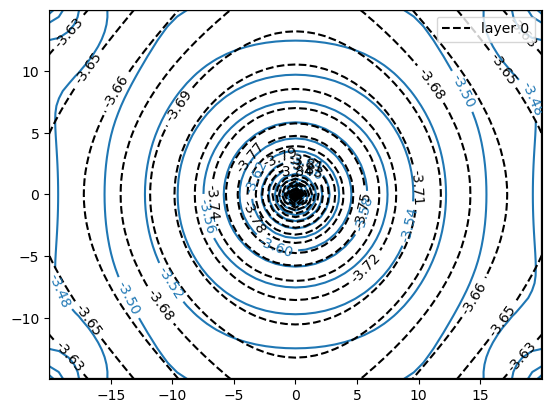

In [23]:
# need to nudge the window here to avoid ZeroDivisionError 
nudge = 1e-6
window = (-dx / 2 + nudge, dx / 2 - nudge, -dy / 2 + nudge, dy / 2 - nudge)

ml2.contour(
    win=window,
    ngr=51,
    levels=30,
    decimals=2,
    layers=[0],
)
ml2_lld.contour(
    win=window,
    ngr=51,
    levels=30,
    decimals=2,
    layers=[0],
    color="k",
    newfig=False,
    linestyles="dashed",
);


In [24]:
x = np.linspace(-100, 100, 100)
h2 = ml2.headalongline(x, np.zeros_like(x))
h2_lld = ml2_lld.headalongline(x, np.zeros_like(x))
h2_ref = ml2_ref.headalongline(x, np.zeros_like(x))

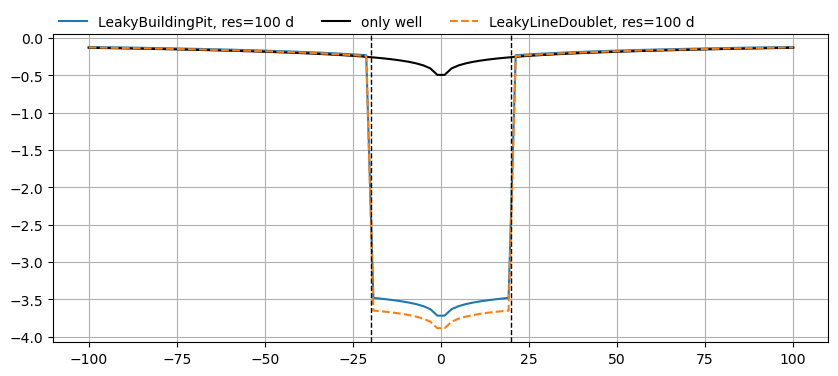

In [25]:
plt.figure(figsize=(10, 4))
plt.plot(x, h2[0], label=f"LeakyBuildingPit, res={res:.0f} d")
plt.plot(x, h2_ref[0], label="only well", color="k")
plt.plot(x, h2_lld[0], label=f"LeakyLineDoublet, res={res:.0f} d", ls="dashed")
plt.axvline(-dx / 2, ls="dashed", color="k", lw=1.0)
plt.axvline(dx / 2, ls="dashed", color="k", lw=1.0)
plt.grid(True)
plt.legend(loc=(0, 1), frameon=False, ncol=3)
plt.ylim(top=0.05);

In [26]:
Qn2 = ml2.disvecalongline(x, np.zeros_like(x))[0]
Qn2_lld = ml2_lld.disvecalongline(x, np.zeros_like(x))[0]

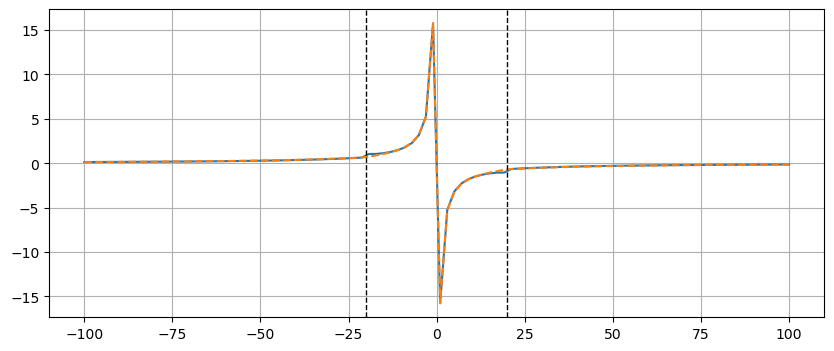

In [27]:
plt.figure(figsize=(10, 4))
plt.plot(x, Qn2[0])
plt.plot(x, Qn2_lld[0], ls="dashed")
plt.axvline(-dx / 2, ls="dashed", color="k", lw=1.0)
plt.axvline(dx / 2, ls="dashed", color="k", lw=1.0)
plt.grid(True)

## 4. Two-layer model

Compare 2-layer model with LeakyBuildingPit to an identical model with an
impermeable pit. Solutions should be equal for:

- res = $\infty$

In [28]:
res = np.inf  # days, resistance of sheetpile wall

In [29]:
# model parameters
kh = 10.0  # m/day
kv = 1.0 * kh  # m/day

ctop = 1000.0  # resistance top leaky layer in days
ctop_in = 1.0

ztop = 0.0  # surface elevation
zwall = -10.0  # bottom elevation of sheetpile wall
zbot = -20.0  # bottom elevation of the model

h_bem = -1.0  # m, top boundary in pit

dx = 40.0  # length building pit in m
dy = 30.0  # width building pit in m

xy = [
    (-dx / 2, -dy / 2),
    (dx / 2, -dy / 2),
    (dx / 2, dy / 2),
    (-dx / 2, dy / 2),
    (-dx / 2, -dy / 2),
]

# get data ready for timml
z = np.array([ztop + 1, ztop, zwall, zwall, zbot])
dz = z[1::2] - z[2::2]
kh_arr = kh * np.ones(dz.shape)
c_outside = np.r_[np.array([ctop]), dz[:-1] / (2 * kv) + dz[1:] / (2 * kv)]
c_inside = np.r_[np.array([ctop_in]), dz[:-1] / (2 * kv) + dz[1:] / (2 * kv)]

In [30]:
# reference solution for res -> inf
ml3_ref = tml.ModelMaq(kaq=kh_arr, z=z, c=c_outside, topboundary="semi", hstar=0.0)
bpit = tml.BuildingPit(
    ml3_ref,
    xy,
    kaq=kh_arr,
    z=z,
    topboundary="semi",
    hstar=h_bem,
    c=c_inside,
    layers=[0],
)
ml3_ref.solve()

Number of elements, Number of equations: 18 , 64
..................
solution complete


In [31]:
ml3 = tml.ModelMaq(kaq=kh_arr, z=z, c=c_outside, topboundary="semi", hstar=0.0)
bpit = tml.LeakyBuildingPit(
    ml3,
    xy,
    kaq=kh_arr,
    z=z,
    topboundary="semi",
    hstar=h_bem,
    c=c_inside,
    layers=[0],
    res=res,
)
ml3.solve()

Number of elements, Number of equations: 18 , 64
..................
solution complete


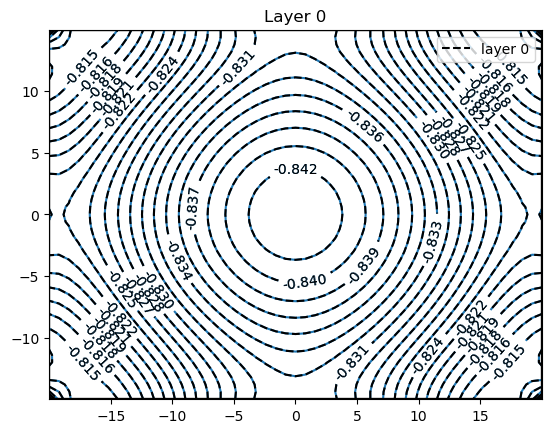

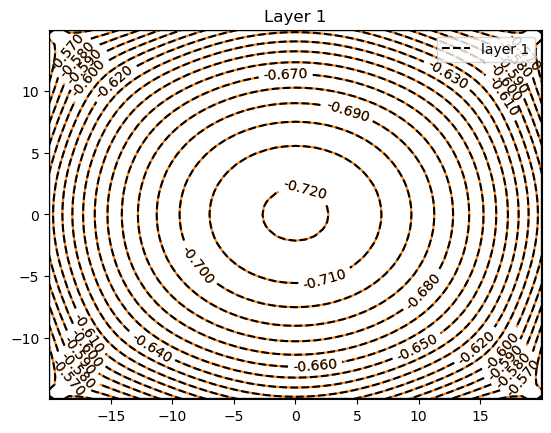

In [32]:
for ilay in [0, 1]:
    ml3.contour(
        win=window,
        ngr=51,
        levels=20,
        decimals=3,
        layers=[ilay],
        color=f"C{ilay}",
    )
    ml3_ref.contour(
        win=window,
        ngr=51,
        levels=20,
        decimals=3,
        layers=[ilay],
        color="k",
        linestyles="dashed",
        newfig=False,
    )
    plt.title(f"Layer {ilay}")

In [33]:
x = np.linspace(-100, 100, 100)
h3 = ml3.headalongline(x, np.zeros_like(x))
h3_ref = ml3_ref.headalongline(x, np.zeros_like(x))

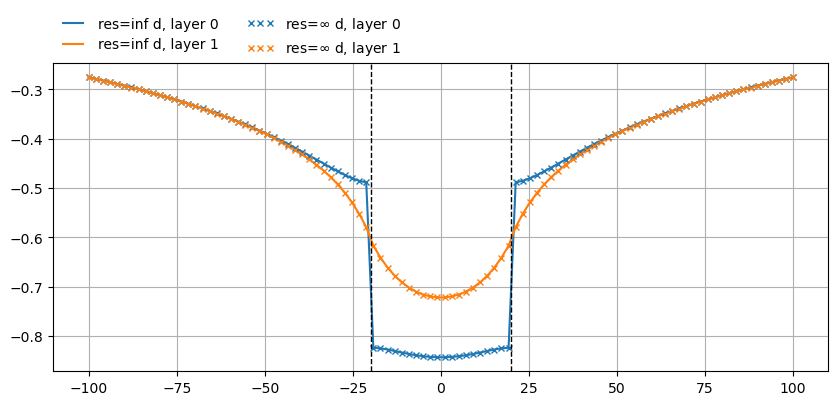

In [34]:
plt.figure(figsize=(10, 4))
plt.plot(x, h3[0], label=f"res={res:.0f} d, layer 0")
plt.plot(x, h3[1], label=f"res={res:.0f} d, layer 1")
plt.plot(
    x, h3_ref[0], c="C0", ls="none", marker="x", ms=4, label="res=$\infty$ d, layer 0"
)
plt.plot(
    x, h3_ref[1], c="C1", ls="none", marker="x", ms=4, label="res=$\infty$ d, layer 1"
)
plt.plot()
plt.axvline(-dx / 2, ls="dashed", color="k", lw=1.0)
plt.axvline(dx / 2, ls="dashed", color="k", lw=1.0)
plt.grid(True)
plt.legend(loc=(0, 1), frameon=False, ncol=2, numpoints=3);

In [35]:
Qn3 = ml3.disvecalongline(x, np.zeros_like(x))[0]
Qn3_ref = ml3_ref.disvecalongline(x, np.zeros_like(x))[0]

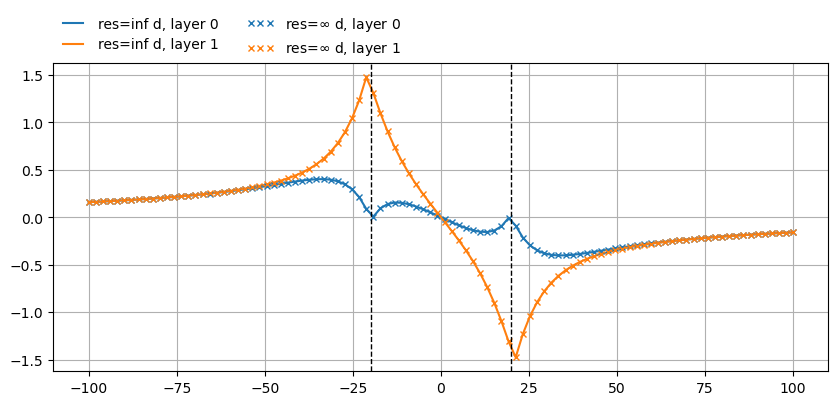

In [36]:
plt.figure(figsize=(10, 4))
plt.plot(x, Qn3[0], label=f"res={res:.0f} d, layer 0")
plt.plot(x, Qn3[1], label=f"res={res:.0f} d, layer 1")
plt.plot(
    x, Qn3_ref[0], c="C0", ls="none", marker="x", ms=4, label="res=$\infty$ d, layer 0"
)
plt.plot(
    x, Qn3_ref[1], c="C1", ls="none", marker="x", ms=4, label="res=$\infty$ d, layer 1"
)
plt.axvline(-dx / 2, ls="dashed", color="k", lw=1.0)
plt.axvline(dx / 2, ls="dashed", color="k", lw=1.0)
plt.grid(True)
plt.legend(loc=(0, 1), frameon=False, ncol=2, numpoints=3);


## 5. Two-layer model with well

Compare 2-layer model with LeakyBuildingPit in first layer with identical model with impermeable walls. Solution should be equal for:

- res = $\infty$

In [37]:
res = np.inf

In [38]:
# reference solution for res -> inf
ml4_ref = tml.ModelMaq(kaq=kh_arr, z=z, c=c_outside, topboundary="semi", hstar=0.0)
bpit = tml.BuildingPit(
    ml4_ref,
    xy,
    kaq=kh_arr,
    z=z,
    topboundary="semi",
    c=c_outside,
    hstar=0.0,
    layers=[0],
)
well = tml.Well(ml4_ref, 0.0, 0.0, Qw=100.0, layers=[0])
ml4_ref.solve()

Number of elements, Number of equations: 19 , 64
...................
solution complete


In [39]:
ml4 = tml.ModelMaq(kaq=kh_arr, z=z, c=c_outside, topboundary="semi", hstar=0.0)
bpit = tml.LeakyBuildingPit(
    ml4,
    xy,
    kaq=kh_arr,
    z=z,
    topboundary="semi",
    c=c_outside,
    hstar=0.0,
    layers=[0],
    res=res,
)
well = tml.Well(ml4, 0.0, 0.0, Qw=100.0, layers=[0])
ml4.solve()

Number of elements, Number of equations: 19 , 64
...................
solution complete


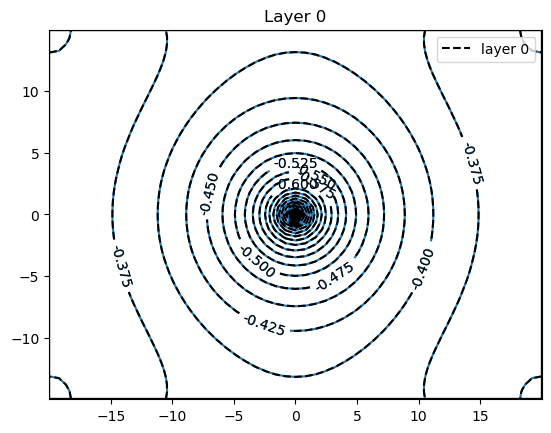

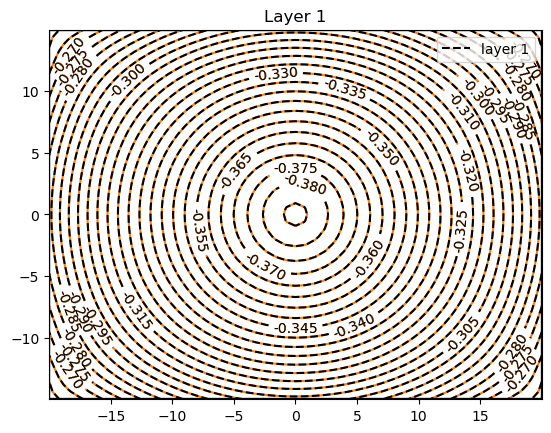

In [40]:
for ilay in [0, 1]:
    ml4.contour(
        win=window,
        ngr=51,
        levels=30,
        decimals=3,
        layers=[ilay],
        color=f"C{ilay}"
    )
    ml4_ref.contour(
        win=window,
        ngr=51,
        levels=30,
        decimals=3,
        layers=[ilay],
        newfig=False,
        linestyles="dashed",
        color="k"
    )
    plt.title(f"Layer {ilay}")


In [41]:
x = np.linspace(-100, 100, 100)
h4 = ml4.headalongline(x, np.zeros_like(x))
h4_ref = ml4_ref.headalongline(x, np.zeros_like(x))

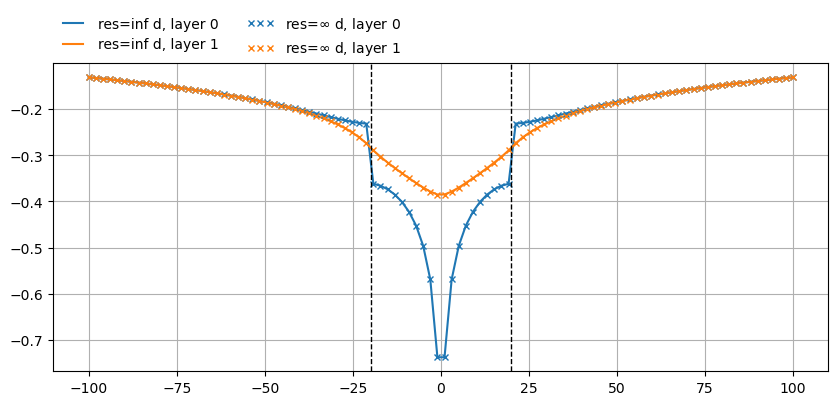

In [42]:
plt.figure(figsize=(10, 4))
plt.plot(x, h4[0], label=f"res={res:.0f} d, layer 0")
plt.plot(x, h4[1], label=f"res={res:.0f} d, layer 1")
plt.plot(
    x, h4_ref[0], c="C0", ls="none", marker="x", ms=4, label="res=$\infty$ d, layer 0"
)
plt.plot(
    x, h4_ref[1], c="C1", ls="none", marker="x", ms=4, label="res=$\infty$ d, layer 1"
)
plt.axvline(-dx / 2, ls="dashed", color="k", lw=1.0)
plt.axvline(dx / 2, ls="dashed", color="k", lw=1.0)
plt.grid(True)
plt.legend(loc=(0, 1), frameon=False, ncol=2, numpoints=3);


In [43]:
Qn4 = ml4.disvecalongline(x, np.zeros_like(x))[0]
Qn4_ref = ml4_ref.disvecalongline(x, np.zeros_like(x))[0]

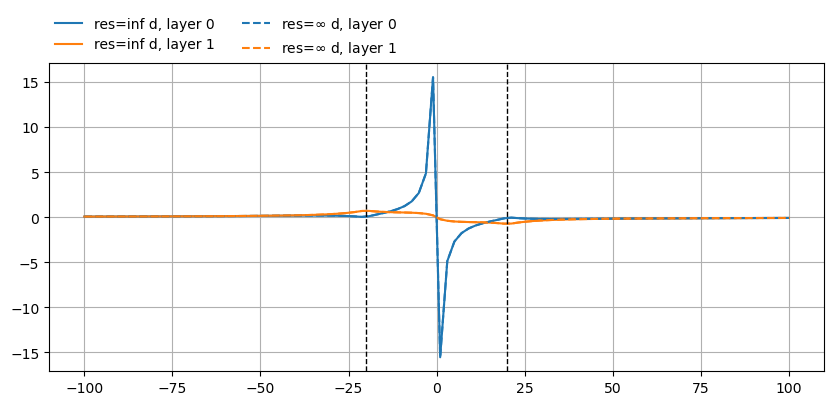

In [44]:
plt.figure(figsize=(10, 4))
plt.plot(x, Qn4[0], label=f"res={res:.0f} d, layer 0")
plt.plot(x, Qn4[1], label=f"res={res:.0f} d, layer 1")
plt.plot(x, Qn4_ref[0], c="C0", ls="dashed", label="res=$\infty$ d, layer 0")
plt.plot(x, Qn4_ref[1], c="C1", ls="dashed", label="res=$\infty$ d, layer 1")
plt.axvline(-dx / 2, ls="dashed", color="k", lw=1.0)
plt.axvline(dx / 2, ls="dashed", color="k", lw=1.0)
plt.grid(True)
plt.legend(loc=(0, 1), frameon=False, ncol=2);

## 6. Two-layer model LeakyBuildingPit vs LeakyLineDoublet

Compare a 2-layer model with LeakyBuildingPit to a model with LeakyLineDoublets. These
models should be equal for all values of res.

- res $\rightarrow 0$ --> working
- res = $\infty$ --> not working
- or any other value --> not working

In [45]:
res = 100.0

In [46]:
ml5 = tml.ModelMaq(kaq=kh_arr, z=z, c=c_outside, topboundary="semi", hstar=0.0)
bpit = tml.LeakyBuildingPit(
    ml5,
    xy,
    kaq=kh_arr,
    z=z,
    topboundary="semi",
    c=c_outside,
    hstar=0.0,
    layers=[0],
    res=res,
)
well = tml.Well(ml5, 0.0, 0.0, Qw=100.0, layers=[0])
ml5.solve()

Number of elements, Number of equations: 19 , 64
...................
solution complete


In [47]:
ml5_lld = tml.ModelMaq(kaq=kh_arr, z=z, c=c_outside, topboundary="semi", hstar=0.0)
lld = tml.LeakyLineDoubletString(ml5_lld, xy=xy, res=res, layers=[0], order=5)  # without order=5 differences become larger
well = tml.Well(ml5_lld, 0.0, 0.0, Qw=100.0)
ml5_lld.solve()

Number of elements, Number of equations: 3 , 24
...
solution complete


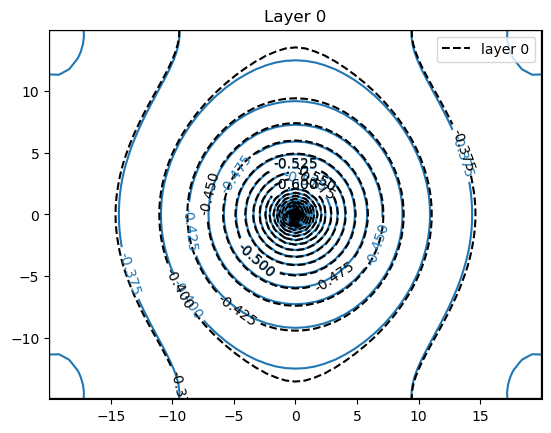

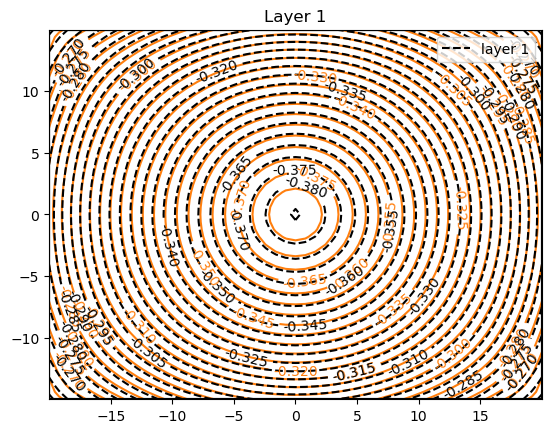

In [48]:
for ilay in [0, 1]:
    ml5.contour(
        win=window,
        ngr=51,
        levels=30,
        decimals=3,
        layers=[ilay],
        color=f"C{ilay}"
    )
    ml5_lld.contour(
        win=window,
        ngr=51,
        levels=30,
        decimals=3,
        layers=[ilay],
        newfig=False,
        linestyles="dashed",
        color="k"
    )
    plt.title(f"Layer {ilay}")


In [49]:
x = np.linspace(-100, 100, 100)
h5 = ml5.headalongline(x, np.zeros_like(x))
h5_lld = ml5_lld.headalongline(x, np.zeros_like(x))

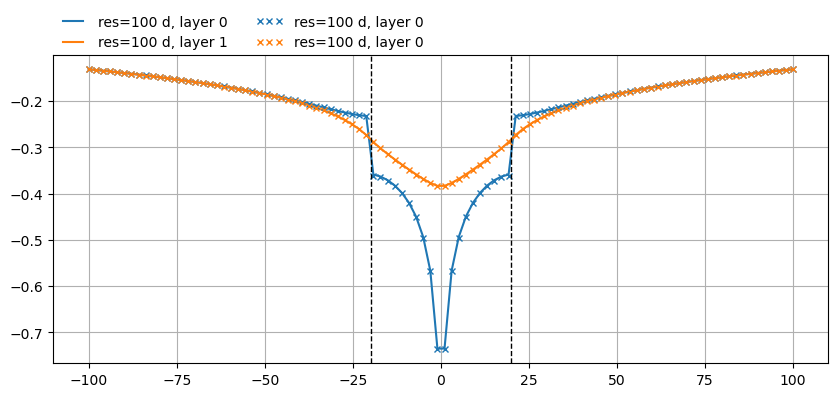

In [50]:
plt.figure(figsize=(10, 4))
plt.plot(x, h5[0], label=f"res={res:.0f} d, layer 0")
plt.plot(x, h5[1], label=f"res={res:.0f} d, layer 1")
plt.plot(
    x, h5_lld[0], c="C0", ls="none", marker="x", ms=4, label=f"res={res:.0f} d, layer 0"
)
plt.plot(
    x, h5_lld[1], c="C1", ls="none", marker="x", ms=4, label=f"res={res:.0f} d, layer 0"
)
plt.axvline(-dx / 2, ls="dashed", color="k", lw=1.0)
plt.axvline(dx / 2, ls="dashed", color="k", lw=1.0)
plt.grid(True)
plt.legend(loc=(0, 1), frameon=False, ncol=2, numpoints=3);


In [51]:
Qn5 = ml5.disvecalongline(x, np.zeros_like(x))[0]
Qn5_lld = ml5_lld.disvecalongline(x, np.zeros_like(x))[0]

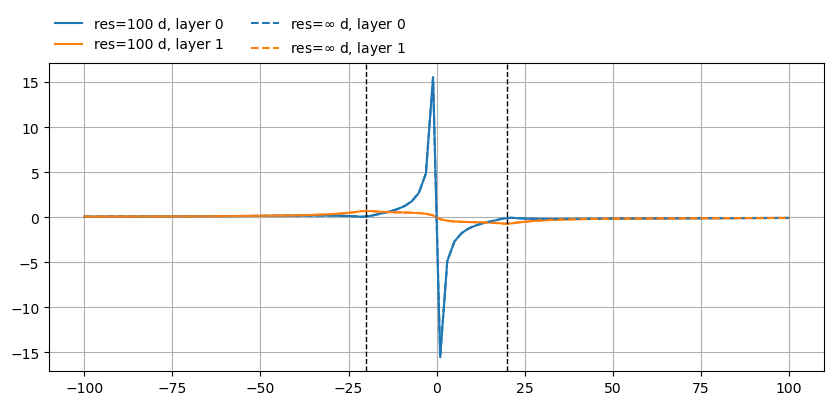

In [52]:
plt.figure(figsize=(10, 4))
plt.plot(x, Qn5[0], label=f"res={res:.0f} d, layer 0")
plt.plot(x, Qn5[1], label=f"res={res:.0f} d, layer 1")
plt.plot(x, Qn5_lld[0], c="C0", ls="dashed", label="res=$\infty$ d, layer 0")
plt.plot(x, Qn5_lld[1], c="C1", ls="dashed", label="res=$\infty$ d, layer 1")
plt.axvline(-dx / 2, ls="dashed", color="k", lw=1.0)
plt.axvline(dx / 2, ls="dashed", color="k", lw=1.0)
plt.grid(True)
plt.legend(loc=(0, 1), frameon=False, ncol=2);